Step 1: Đọc và kiểm tra dữ liệu

In [2]:
import pandas as pd

# Đọc dữ liệu
df = pd.read_csv("calories.csv")

# Xem 5 dòng đầu tiên
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [4]:
df.info()   # Kiểm tra kiểu dữ liệu, số lượng giá trị thiếu
print(df.describe()) # Thống kê dữ liệu (trung bình, min, max...)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB
            User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000  

XỬ LÝ DỮ LIỆU

In [5]:
# Mã hóa Gender
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})

In [6]:
df = df.dropna() # Loại bỏ dữ liệu bị thiếu

In [7]:
df.fillna(df.mean(), inplace=True) # Điền giá trị trung bình

In [8]:
X = df[['Age','Height', 'Weight', 'Gender','Duration', 'Heart_Rate', 'Body_Temp']] # Chọn các biến đầu vào
y = df['Calories']  # Biến mục tiêu


Step 2: Chia train và test

In [9]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kiểm tra kích thước dữ liệu sau khi chia
print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")


Train size: (12000, 7), Test size: (3000, 7)


Chuẩn hoá dữ liệu

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)  # Dùng cùng scaler đã fit để đảm bảo nhất quán

Step 3: Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

# Khởi tạo mô hình
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Dự đoán lượng calo tiêu hao
y_pred = model.predict(X_test)

# Xem 5 kết quả dự đoán đầu tiên
print(y_pred[:5])

[170.67646027 192.08857813  56.14796403 155.47641482 212.45066668]


In [14]:
# Đánh giá mô hình
from sklearn.metrics import mean_absolute_error, r2_score

# Đánh giá sai số
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 8.44
R² Score: 0.97


Step 4: Vẽ biểu đồ

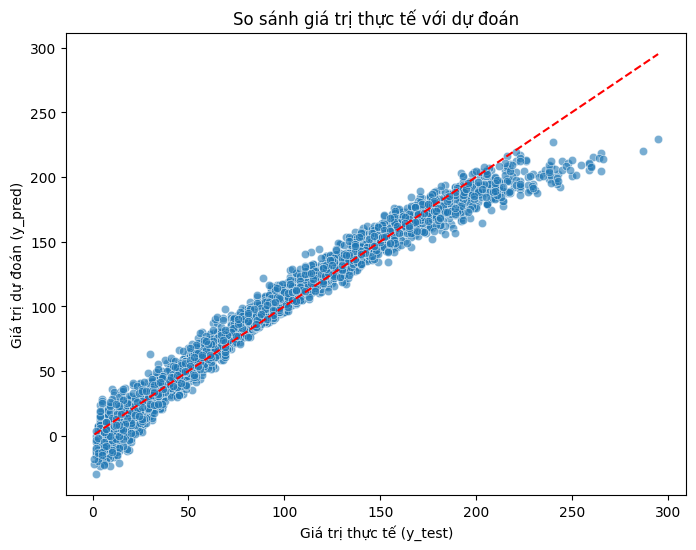

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ biểu đồ scatter giữa giá trị thực tế và giá trị dự đoán
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Vẽ đường y = x để so sánh
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Thêm nhãn
plt.xlabel("Giá trị thực tế (y_test)")
plt.ylabel("Giá trị dự đoán (y_pred)")
plt.title("So sánh giá trị thực tế với dự đoán")

plt.show()

Step 5: tối ưu mô hình

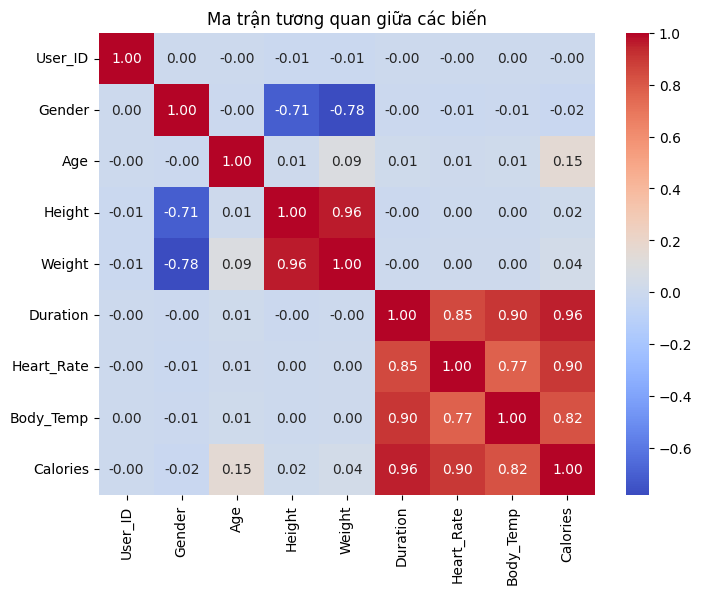

In [16]:
#Kiểm tra độ tương quan
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ ma trận tương quan
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các biến")
plt.show()


In [17]:
#Loại bỏ các biến không quan trọng
X_opt = df[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']]

# Chia dữ liệu
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_opt, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler_opt = StandardScaler()
X_train_opt = scaler_opt.fit_transform(X_train_opt)
X_test_opt = scaler_opt.transform(X_test_opt)

# Huấn luyện lại mô hình
model_opt = LinearRegression()
model_opt.fit(X_train_opt, y_train_opt)

# Đánh giá lại mô hình
y_pred_opt = model_opt.predict(X_test_opt)
mae_opt = mean_absolute_error(y_test_opt, y_pred_opt)
r2_opt = r2_score(y_test_opt, y_pred_opt)

print(f"MAE sau tối ưu: {mae_opt:.2f}")
print(f"R² Score sau tối ưu: {r2_opt:.2f}")


MAE sau tối ưu: 8.44
R² Score sau tối ưu: 0.97


Thử với mô hình Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Đọc dữ liệu
df = pd.read_csv("calories.csv")

# Loại bỏ các biến không quan trọng
df = df.drop(columns=["User_ID", "Gender"], errors="ignore")

# Chọn biến đầu vào và biến mục tiêu
X_opt = df[['Duration', 'Heart_Rate', 'Body_Temp', "Height", "Weight", "Age"]]
y = df['Calories']

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_opt, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler_opt = StandardScaler()
X_train_opt = scaler_opt.fit_transform(X_train_opt)
X_test_opt = scaler_opt.transform(X_test_opt)

# Khởi tạo mô hình Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện mô hình
rf_model.fit(X_train_opt, y_train_opt)

# Dự đoán
y_pred_rf = rf_model.predict(X_test_opt)

# Đánh giá mô hình
mae_rf = mean_absolute_error(y_test_opt, y_pred_rf)
r2_rf = r2_score(y_test_opt, y_pred_rf)

# In kết quả
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")


Mean Absolute Error (MAE): 2.51
R² Score: 1.00


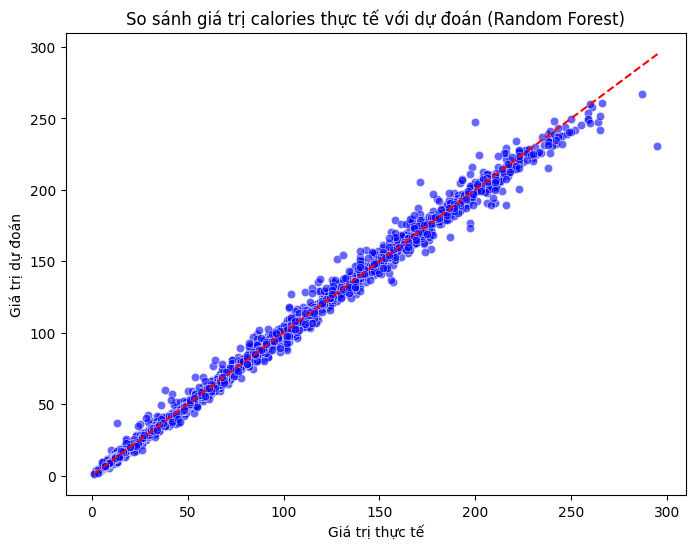

In [21]:
# Vẽ biểu đồ scatter giữa giá trị thực tế và dự đoán
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_opt, y=y_pred_rf, alpha=0.6, color="blue")

# Vẽ đường y = x (đường dự đoán hoàn hảo)
plt.plot([min(y_test_opt), max(y_test_opt)], [min(y_test_opt), max(y_test_opt)], '--', color='red')

# Thiết lập tiêu đề và nhãn trục
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.title("So sánh giá trị calories thực tế với dự đoán (Random Forest)")

# Hiển thị biểu đồ
plt.show()